## In this program, our objective will be the prediction of ford cars

Collect Data: It can be found in Kaggle - https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction/data

In [2680]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline


from sklearn.compose import ColumnTransformer

In [2681]:
import warnings


warnings.filterwarnings('ignore')



In [2682]:
PATH_DATA = os.path.join(r'C:\Users\caioe\OneDrive\Área de Trabalho\Flight_Prices')


In [2683]:
df = pd.read_csv(os.path.join(PATH_DATA, "ford.csv"))

2. EDA

Understand your data: Visualize the distribution of wine features, investigate outliers, and look for missing data.

In [2684]:
df.head(50)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [2685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [2686]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [2687]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [2688]:
for column in df.columns:
    print(f"Unique Values of '{column}':")
    print(df[column].unique())
    print()

Unique Values of 'model':
[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']

Unique Values of 'year':
[2017 2018 2019 2015 2014 2016 2013 2020 2012 2008 2010 2009 2011 1998
 2007 2005 2006 2002 2003 1996 2004 2000 2060]

Unique Values of 'price':
[12000 14000 13000 ... 12849 16249 18122]

Unique Values of 'transmission':
['Automatic' 'Manual' 'Semi-Auto']

Unique Values of 'mileage':
[15944  9083 12456 ... 31348  7010  5007]

Unique Values of 'fuelType':
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']

Unique Values of 'tax':
[150 145   0  20 160 125  30 235 240 200 165 140 570 205 260 580 135 265
 300 195 120 555 325 155 270 115 110 190 210 185 330 230 220 305 290  22]

Unique Values of 'mpg':
[ 57.7  40.3  48.7  47.9  50.4  54.3  42.2  61.4  56.5  65.7  58.9  6

In [2689]:
for column in df:
    if df[column].dtype == 'object':
        print(df[column].value_counts(normalize = True)*100)




model
 Fiesta                   36.496716
 Focus                    25.537126
 Kuga                     12.384504
 EcoSport                  6.362017
 C-MAX                     3.022376
 Ka+                       2.955583
 Mondeo                    2.927752
 B-MAX                     1.975955
 S-MAX                     1.647556
 Grand C-MAX               1.374819
 Galaxy                    1.269064
 Edge                      1.157742
 KA                        1.107648
 Puma                      0.445286
 Tourneo Custom            0.384059
 Grand Tourneo Connect     0.328398
 Mustang                   0.317266
 Tourneo Connect           0.183680
 Fusion                    0.089057
 Streetka                  0.011132
 Ranger                    0.005566
 Escort                    0.005566
 Transit Tourneo           0.005566
Focus                      0.005566
Name: proportion, dtype: float64
transmission
Manual       86.374262
Automatic     7.575420
Semi-Auto     6.050317
Name: proportio

In [2690]:
df['model'] = df['model'].str.strip()

In [2691]:
mapa_modelos_tipos = {
    'Puma': 'SUV', 'EcoSport': 'SUV',
    'C-MAX': 'Minivan', 'Mondeo': 'Sedan', 'Ka+': 'Hatch', 'Tourneo Custom': 'Minivan', 
    'S-MAX': 'Minivan', 'B-MAX': 'Minivan', 'Edge': 'SUV', 'Tourneo Connect': 'Minivan', 
    'Grand C-MAX': 'Minivan', 'KA': 'Hatch', 'Galaxy': 'Minivan', 'Mustang': 'Esportivo', 
    'Grand Tourneo Connect': 'Minivan', 'Fusion': 'Sedan', 'Ranger': 'Pick-up', 
    'Streetka': 'Esportivo', 'Escort': 'Hatch', 'Transit Tourneo': 'Minivan'
}

# Substituir o modelo pelo tipo
df['type'] = df.apply(lambda row: row['model'] if row['model'] in ['Fiesta', 'Focus','Kuga'] 
                      else mapa_modelos_tipos.get(row['model'], 'Outro'), axis=1)

df.drop(columns = 'model', inplace = True)

In [2692]:
df = df[(df['fuelType'] == 'Petrol') | (df['fuelType'] == 'Diesel')]


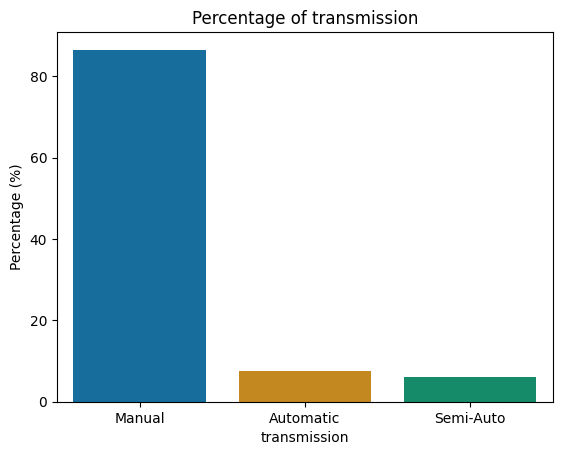

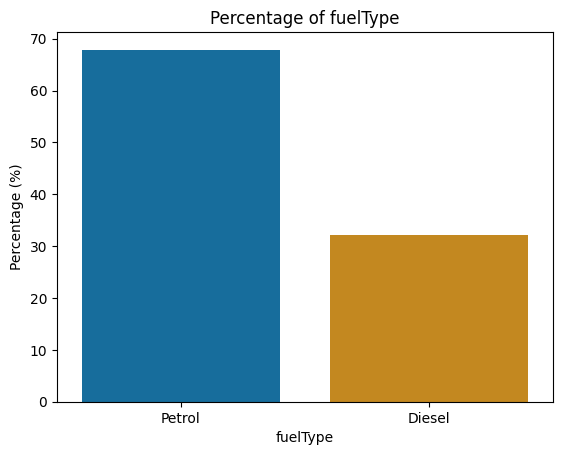

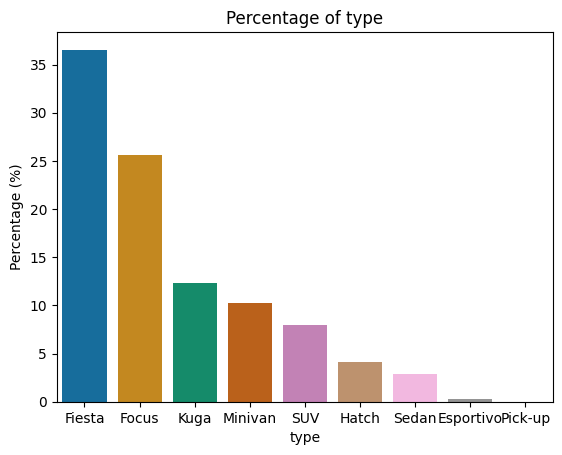

In [2693]:
for column in df:
    if df[column].dtype == 'object':
        counts = df[column].value_counts(normalize=True)  # Normaliza para obter as porcentagens
        percentages = counts * 100  

        # Criando um DataFrame para plotar
        percent_df = percentages.reset_index()
        percent_df.columns = [column, 'percentage']

        # Criando o gráfico
        sns.barplot(data=percent_df, x=column, y='percentage', palette='colorblind')

        # Exibindo o gráfico
        plt.ylabel('Percentage (%)')
        plt.title(f'Percentage of {column}')
        plt.show()

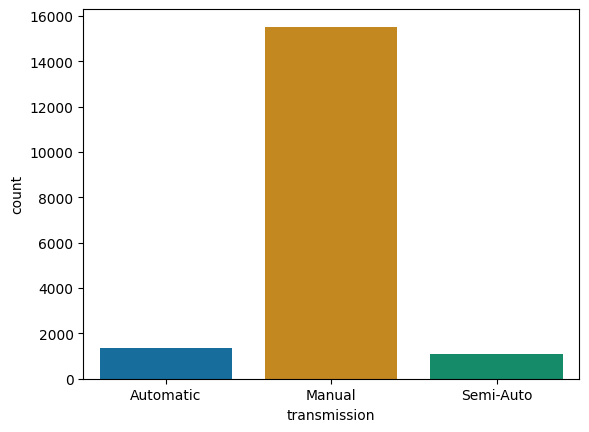

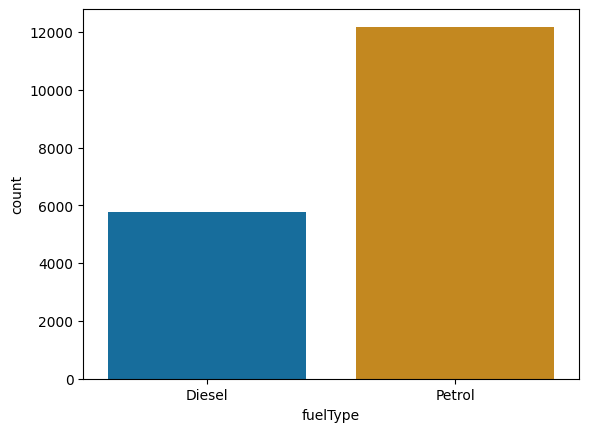

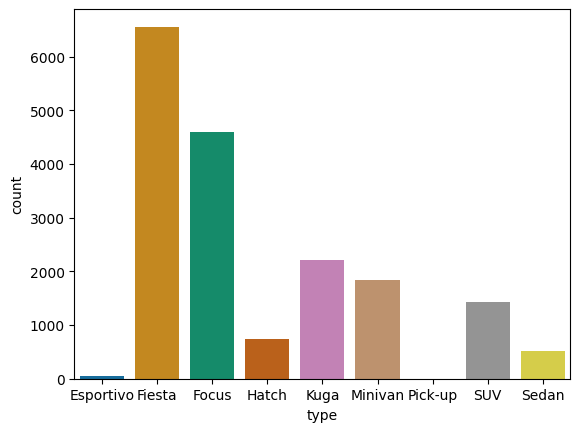

In [2694]:
for column in df:
    if df[column].dtype == 'object':
        sorted_categories = df[column].value_counts().index.sort_values(ascending=True).tolist()
        sns.countplot(data = df, x = column, order = sorted_categories, palette='colorblind')
        plt.show();

Analizing numeric features

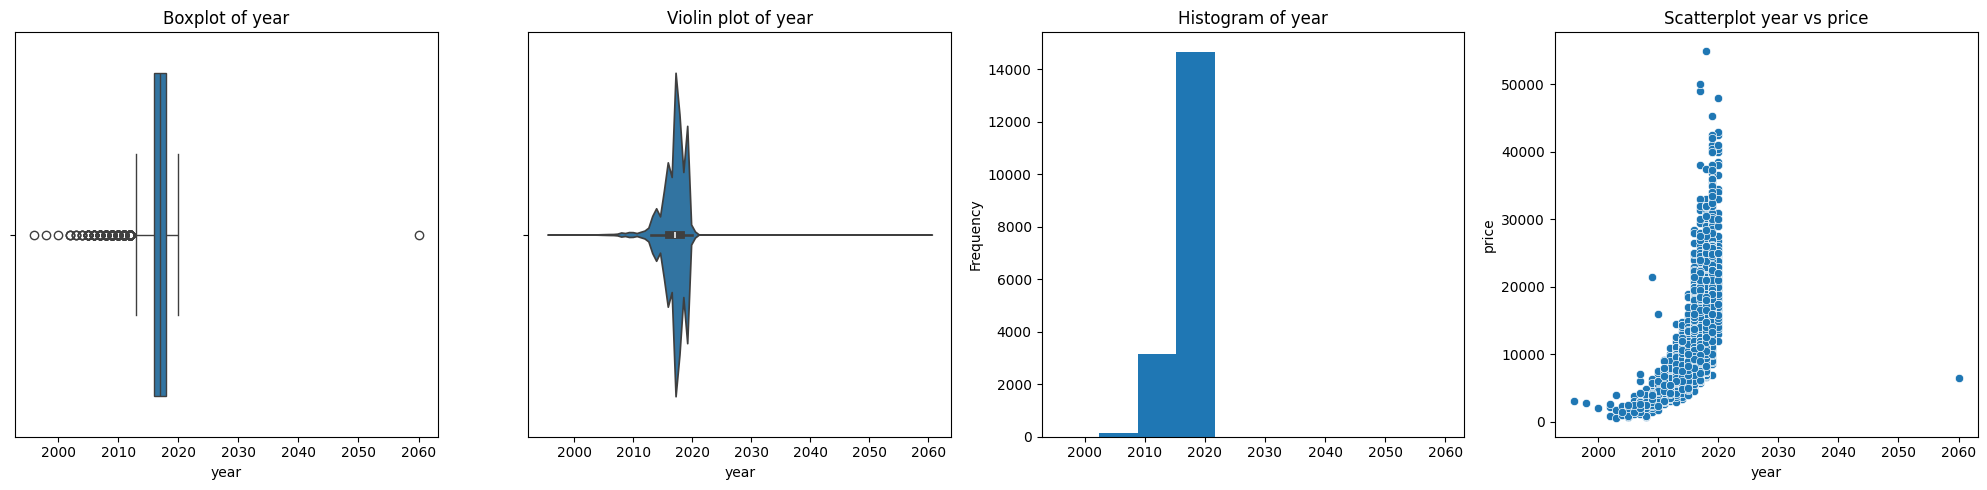

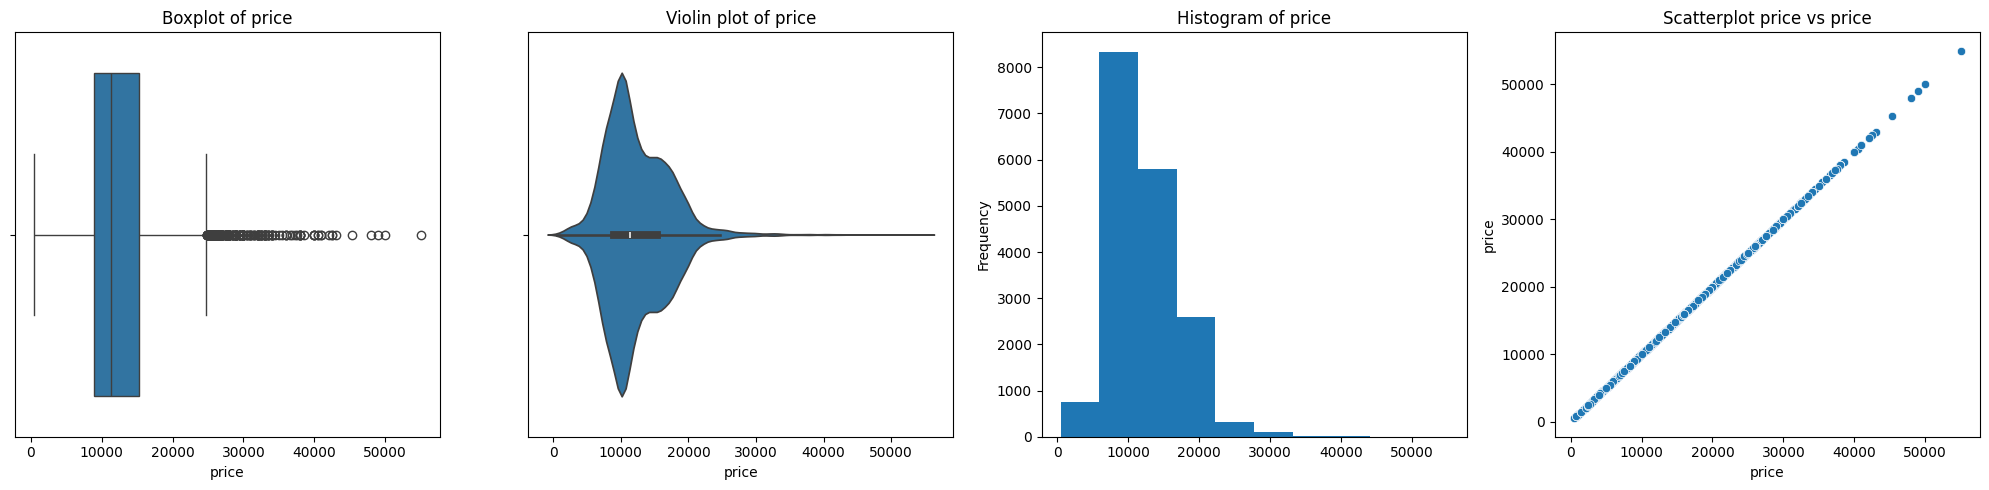

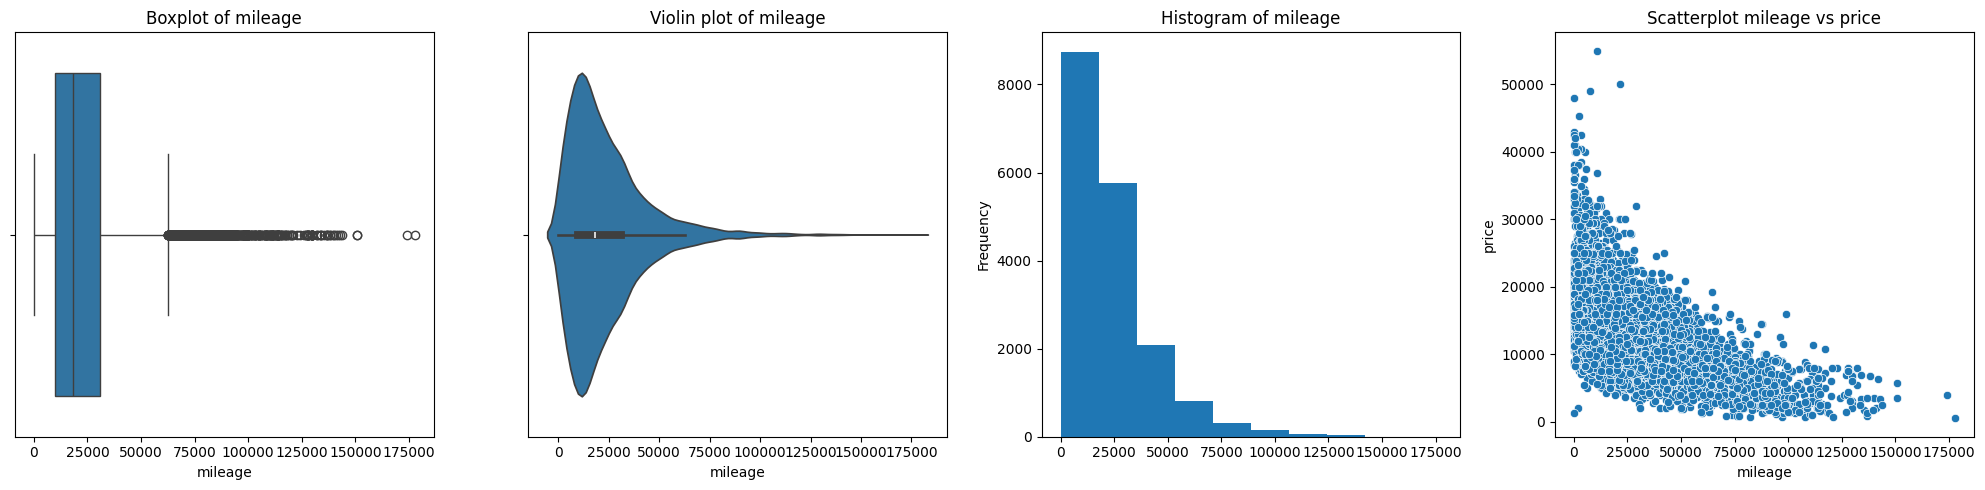

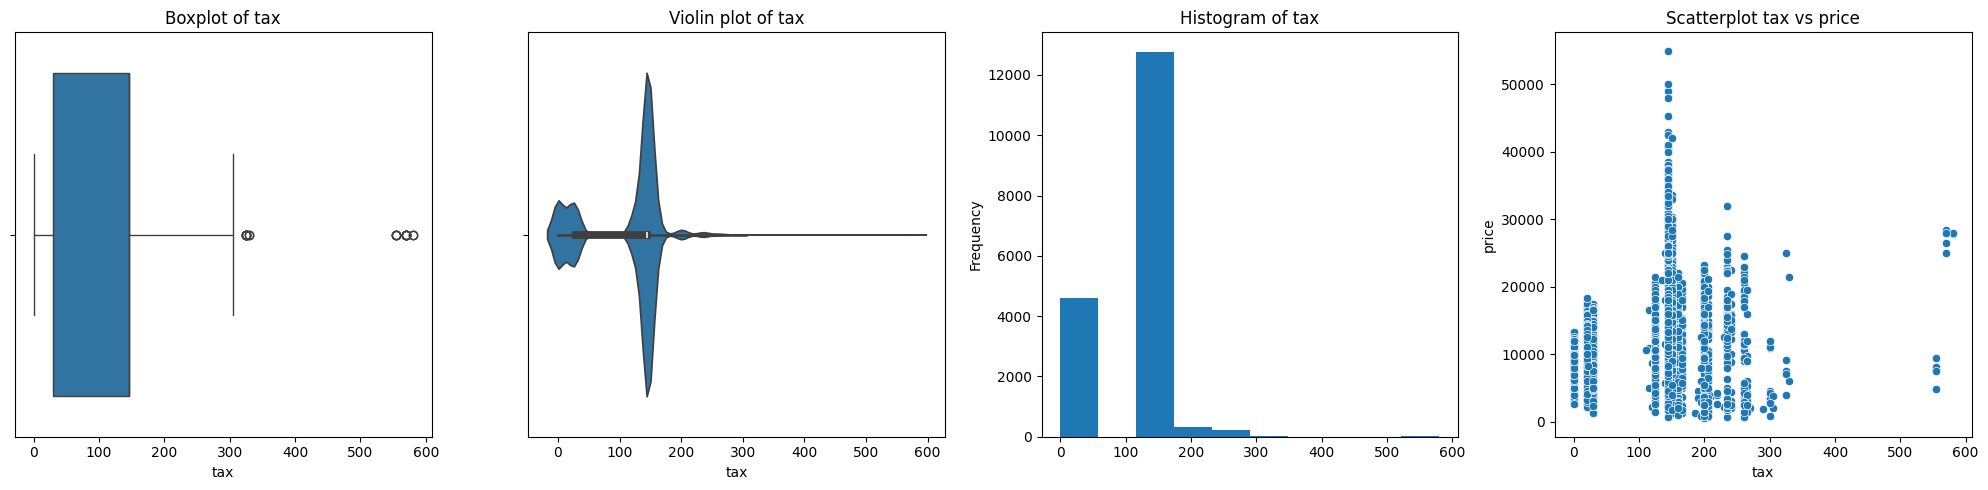

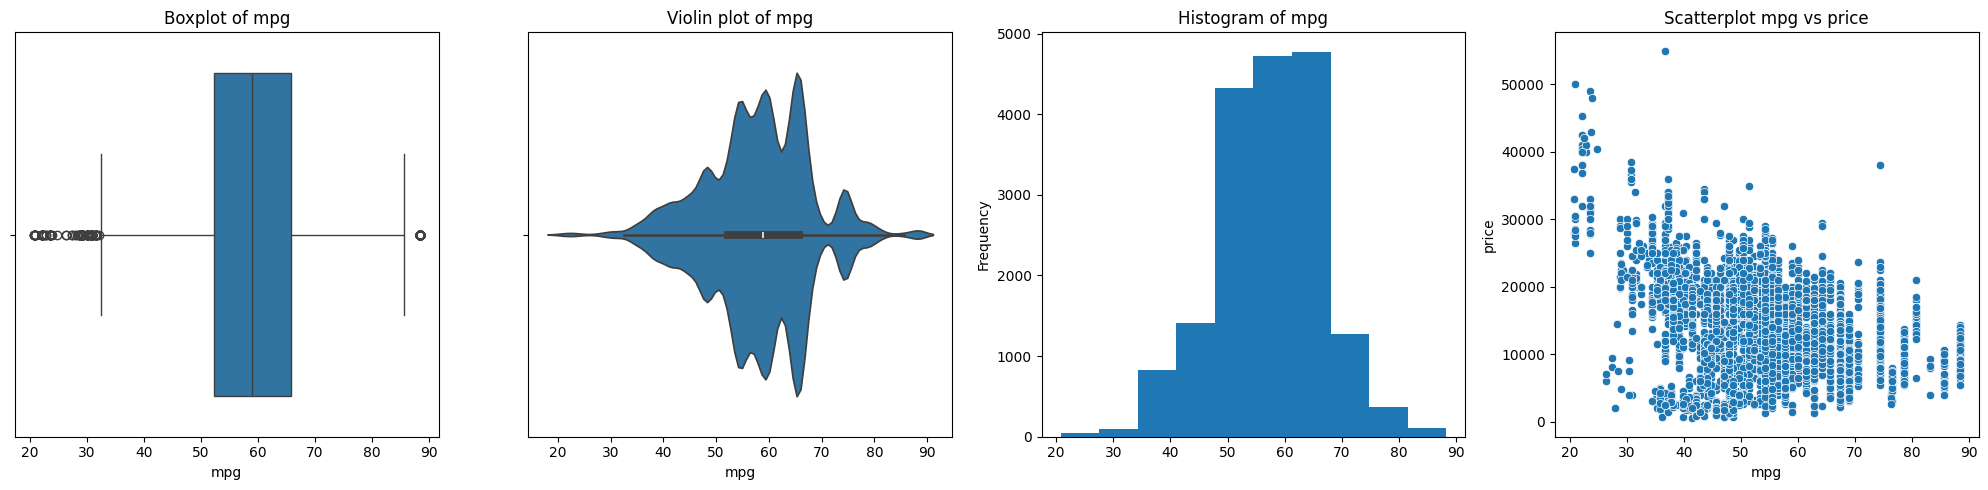

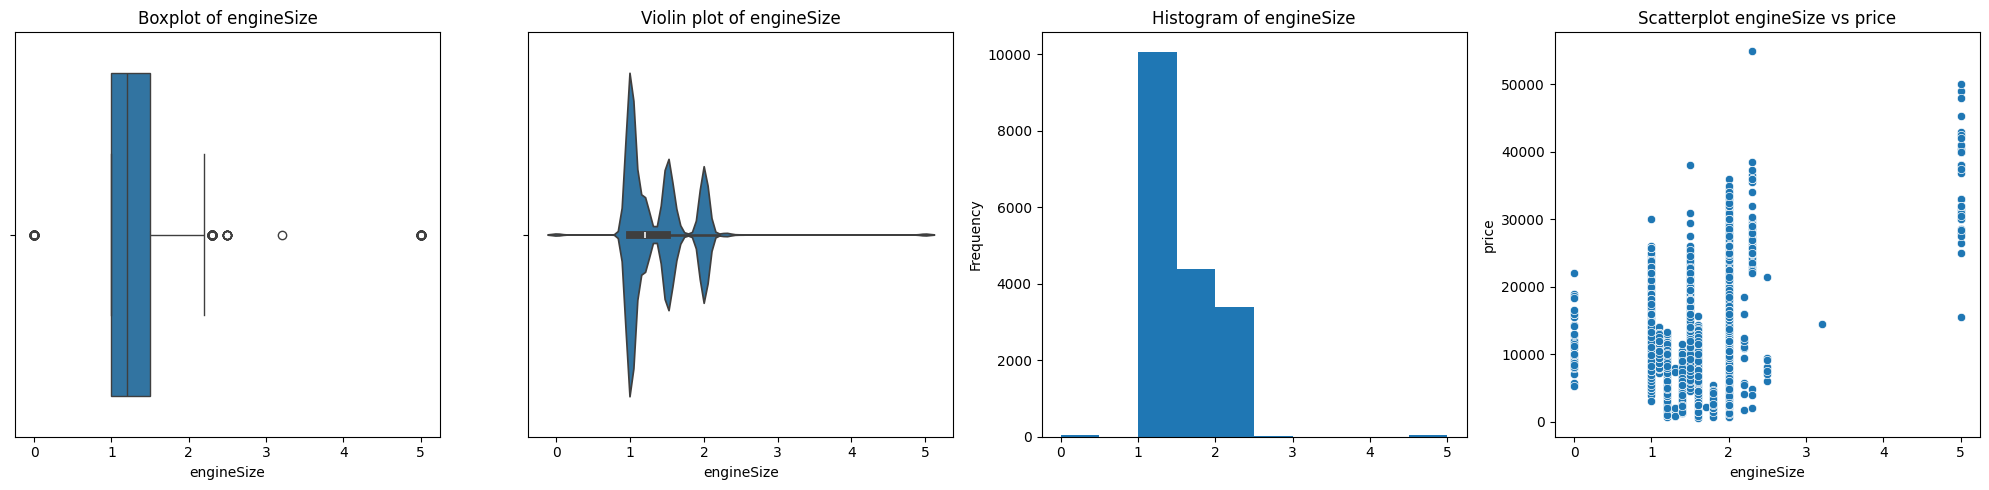

In [2695]:


for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):  
        
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))  
        
        
        sns.boxplot(data=df, x=column, ax=axes[0])
        axes[0].set_title(f'Boxplot of {column}')
        
        # Gráfico Violinplot
        sns.violinplot(data=df, x=column, ax=axes[1])
        axes[1].set_title(f'Violin plot of {column}')
        
        # Gráfico Histograma
        df[column].plot.hist(ax=axes[2], bins=10)
        axes[2].set_title(f'Histogram of {column}')
        
        # Scatterplot com o preço
        sns.scatterplot(data=df, x=column, y='price', ax=axes[3])
        axes[3].set_title(f'Scatterplot {column} vs price')
        
        # Ajustando o layout
        plt.tight_layout()  
        plt.show()



Removing outliers

In [2696]:
outlier_data = {}
for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        # Cálculo dos limites de outliers
        outlier_upper = q3 + 1.5 * iqr
        outlier_lower = q1 - 1.5 * iqr
        
        # Armazenando os limites no dicionário
        outlier_data[column] = {'Outlier Upper': outlier_upper, 'Outlier Lower': outlier_lower}

# Criando um DataFrame a partir do dicionário
outlier_df = pd.DataFrame.from_dict(outlier_data, orient='index').reset_index()
outlier_df.columns = ['Variable', 'Outlier Upper', 'Outlier Lower']

# Exibindo o DataFrame com limites de outliers
outlier_df.head(10)

,Variable,Outlier Upper,Outlier Lower
0,year,2021.00,2013.00
1,price,24739.00,-445.00
2,mileage,62661.50,-21598.50
3,tax,317.50,-142.50
4,mpg,85.80,32.20
5,engineSize,2.25,0.25


Removing outliers

In [2697]:
for index, row in outlier_df.iterrows():
    column_name = row['Variable'] 
    outlier_upper = row['Outlier Upper']
    outlier_lower = row['Outlier Lower']  

    
    if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
        
        df = df[(df[column_name] <= outlier_upper) & (df[column_name]>=outlier_lower)]
   


In [2698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16436 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          16436 non-null  int64  
 1   price         16436 non-null  int64  
 2   transmission  16436 non-null  object 
 3   mileage       16436 non-null  int64  
 4   fuelType      16436 non-null  object 
 5   tax           16436 non-null  int64  
 6   mpg           16436 non-null  float64
 7   engineSize    16436 non-null  float64
 8   type          16436 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 1.3+ MB


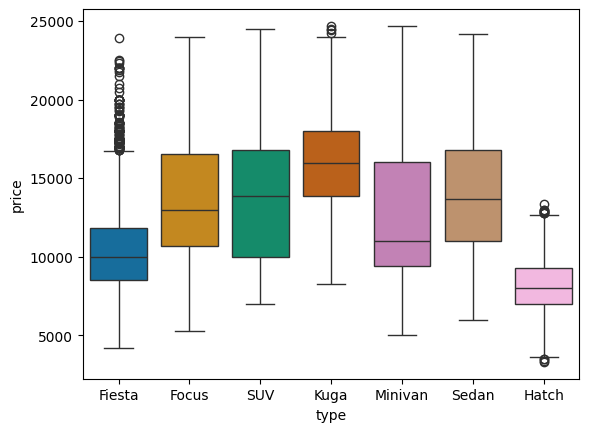

In [2699]:
sns.boxplot(data=df, y='price', x = 'type', palette = 'colorblind')
plt.show()

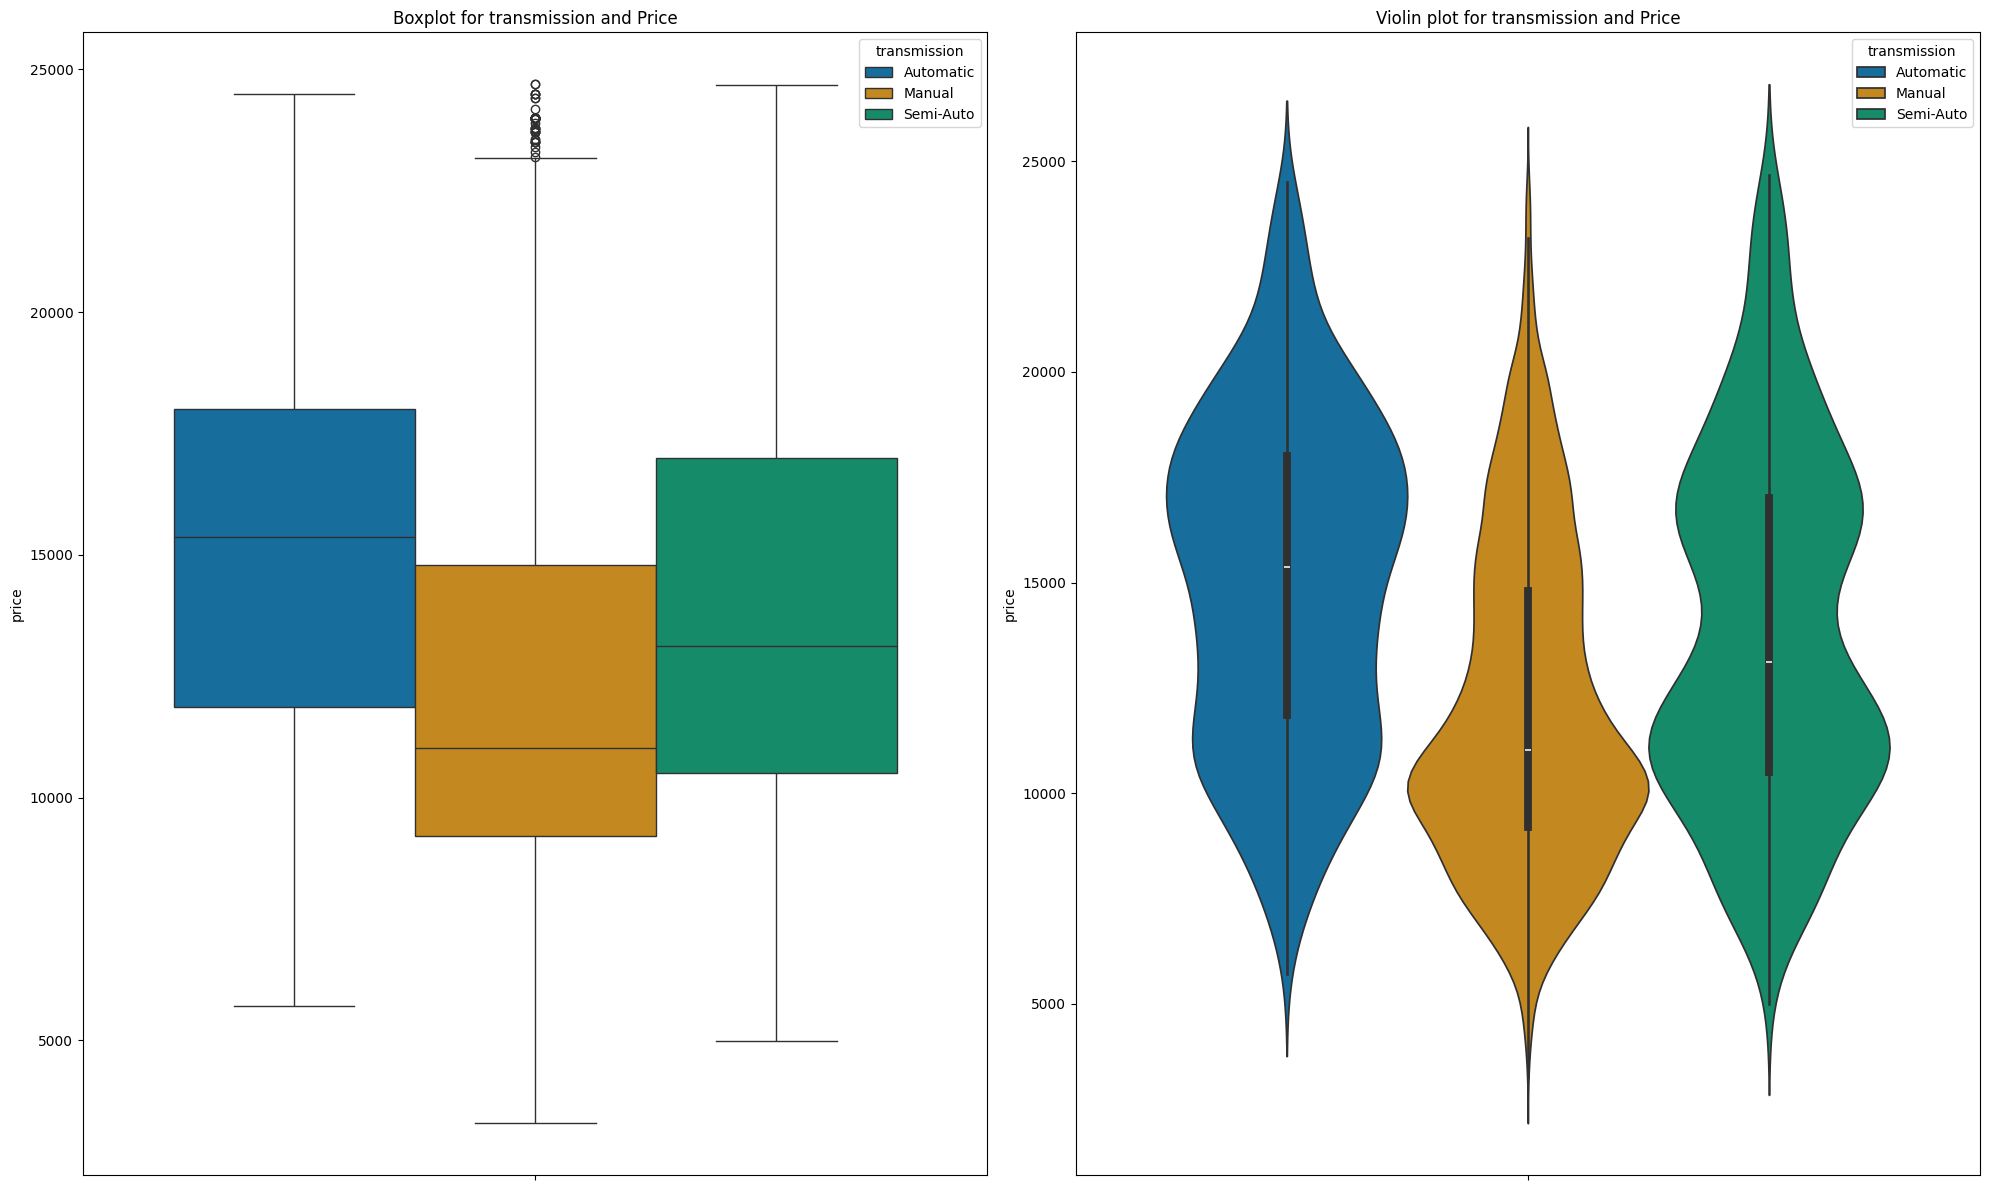

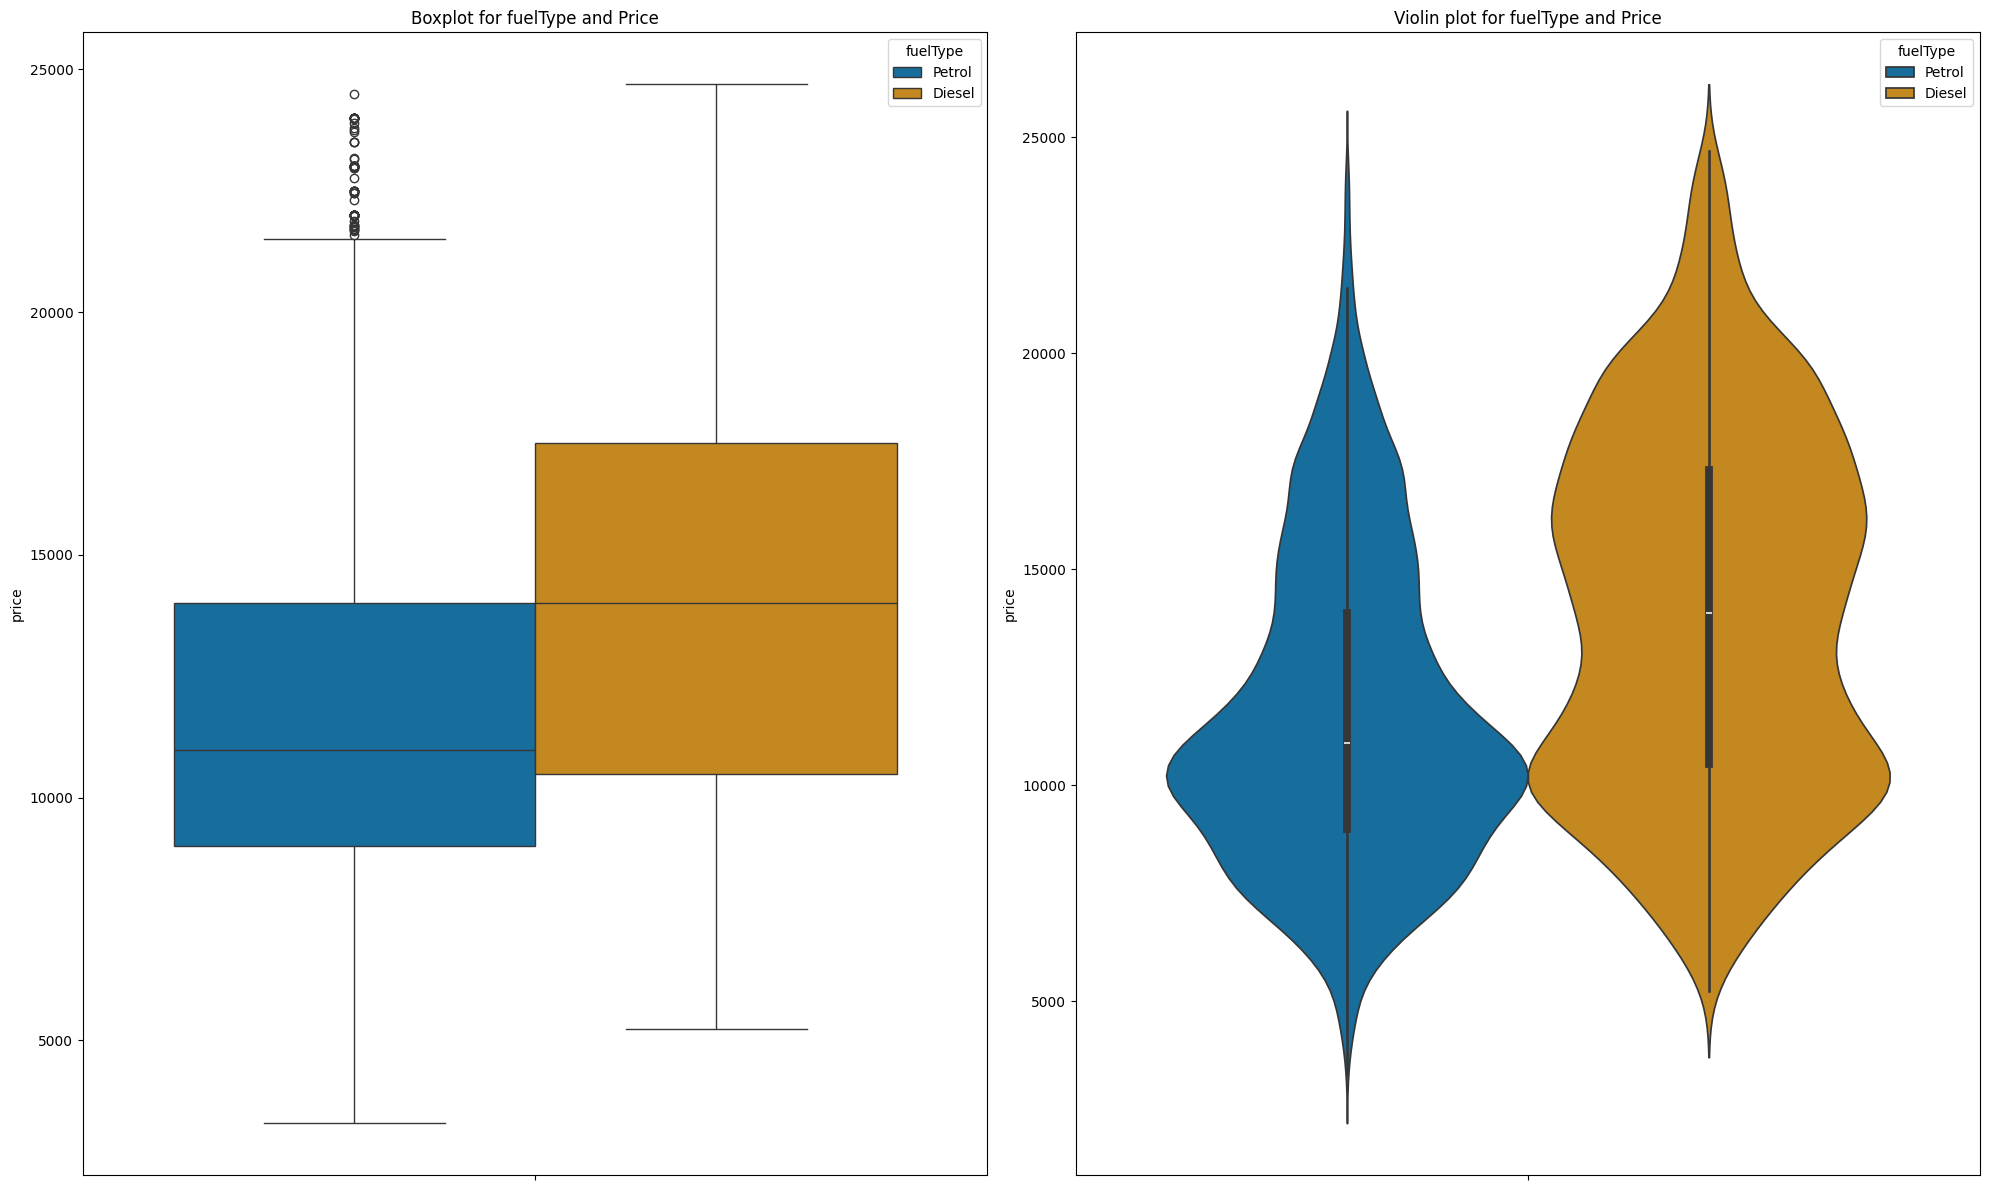

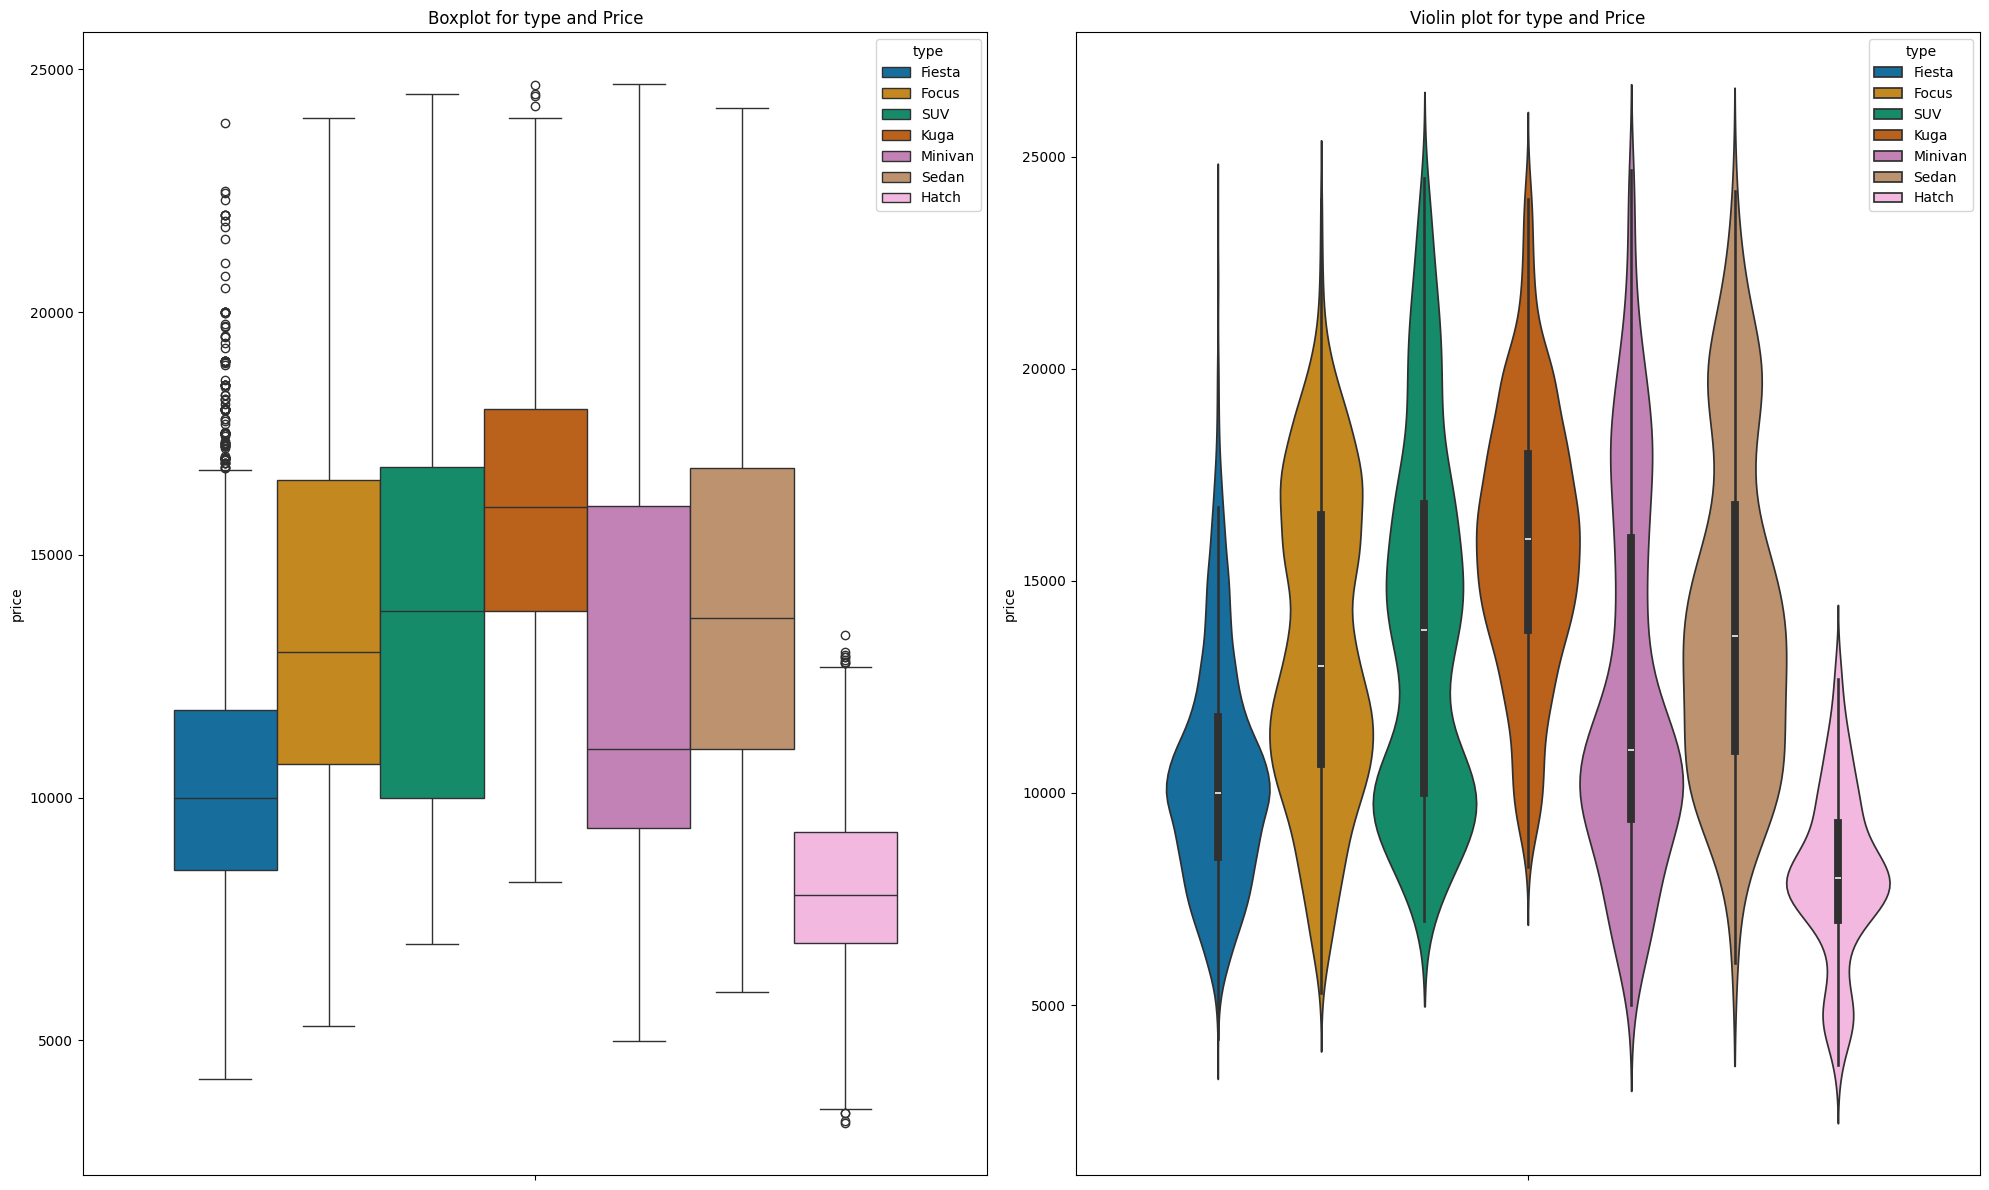

In [2700]:
for column in df:
    if pd.api.types.is_object_dtype(df[column]):
        fig, axes = plt.subplots(1, 2, figsize=(20, 12))  
        
        
        sns.boxplot(data=df, y='price', hue = column, palette = 'colorblind', ax=axes[0])
        axes[0].set_title(f'Boxplot for {column} and Price')
        
        
        sns.violinplot(data=df, y='price', hue = column, palette = 'colorblind',ax=axes[1])
        axes[1].set_title(f'Violin plot for {column} and Price')
        
        
        
        
        
        plt.tight_layout()  
        plt.show()

Luckly, everything is clean and organized. We have few outliers, but it won't cause problem.

Next steps -> LabelEncoding and OneHotEncoding

In [2701]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,type
0,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Fiesta
1,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Focus
2,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Focus
3,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Fiesta
4,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Fiesta


In [2702]:
df.head(5)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,type
0,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Fiesta
1,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Focus
2,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Focus
3,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Fiesta
4,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Fiesta


In [2703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16436 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          16436 non-null  int64  
 1   price         16436 non-null  int64  
 2   transmission  16436 non-null  object 
 3   mileage       16436 non-null  int64  
 4   fuelType      16436 non-null  object 
 5   tax           16436 non-null  int64  
 6   mpg           16436 non-null  float64
 7   engineSize    16436 non-null  float64
 8   type          16436 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 1.3+ MB


In [2704]:
columns_to_encode = df.select_dtypes(include=['object']).columns

In [2705]:

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), columns_to_encode)
    ],
    remainder='passthrough'  # Mantener las columnas restantes inalteradas
)


df_encoded_array = preprocessor.fit_transform(df)


encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(columns_to_encode)


non_encoded_feature_names = df.drop(columns=columns_to_encode).columns

all_feature_names = list(encoded_feature_names) + list(non_encoded_feature_names)


df = pd.DataFrame(df_encoded_array, columns=all_feature_names)

In [2706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transmission_Automatic  16436 non-null  float64
 1   transmission_Manual     16436 non-null  float64
 2   transmission_Semi-Auto  16436 non-null  float64
 3   fuelType_Diesel         16436 non-null  float64
 4   fuelType_Petrol         16436 non-null  float64
 5   type_Fiesta             16436 non-null  float64
 6   type_Focus              16436 non-null  float64
 7   type_Hatch              16436 non-null  float64
 8   type_Kuga               16436 non-null  float64
 9   type_Minivan            16436 non-null  float64
 10  type_SUV                16436 non-null  float64
 11  type_Sedan              16436 non-null  float64
 12  year                    16436 non-null  float64
 13  price                   16436 non-null  float64
 14  mileage                 16436 non-null

In [2707]:
def corr(df):
    df_corr = df
    correlation_matrix = df_corr.corr()
    plt.figure(figsize=(15, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    return plt.show()

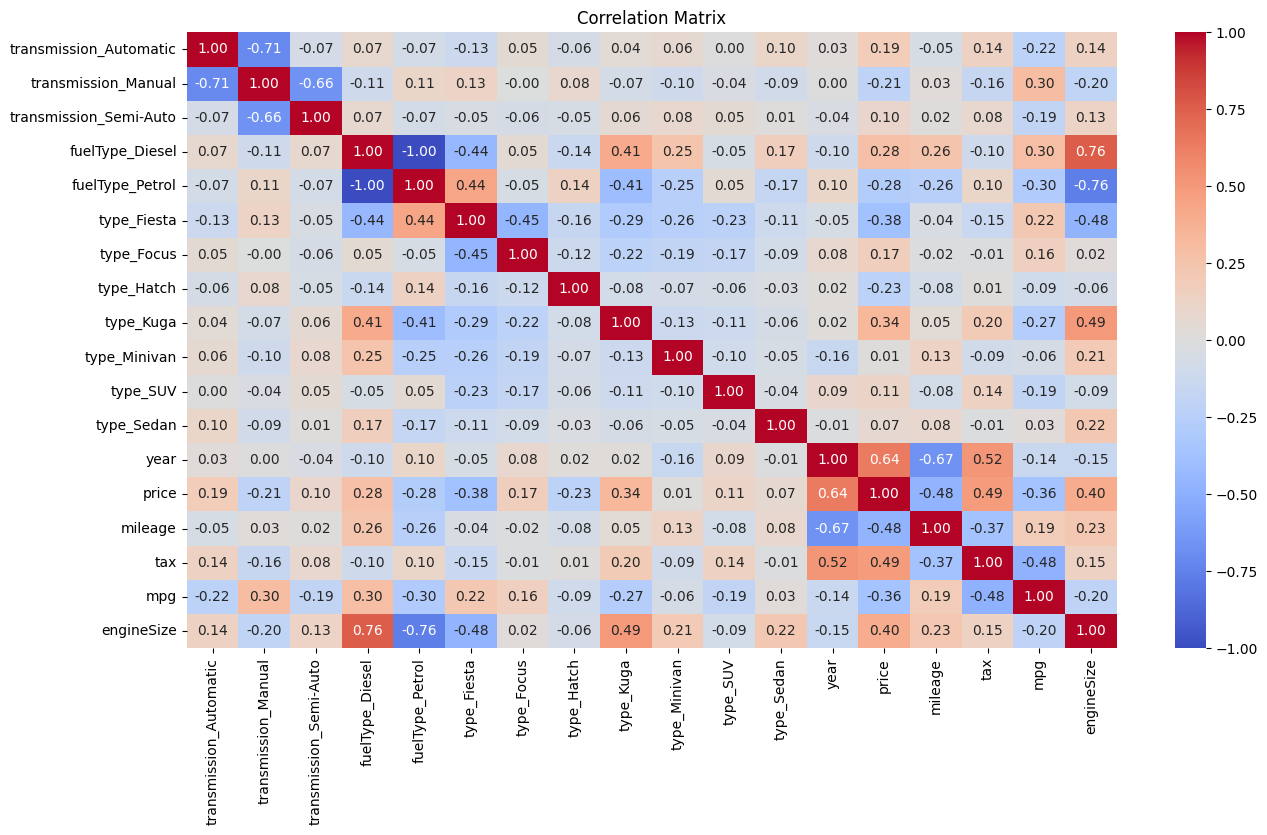

In [2708]:
corr(df)

As it seems above, elimination of milage, manual_transmition and fueltype_Diesel seems a clever idea.

In [2709]:
df.drop(columns =['mileage','fuelType_Diesel', 'transmission_Manual'], inplace = True)

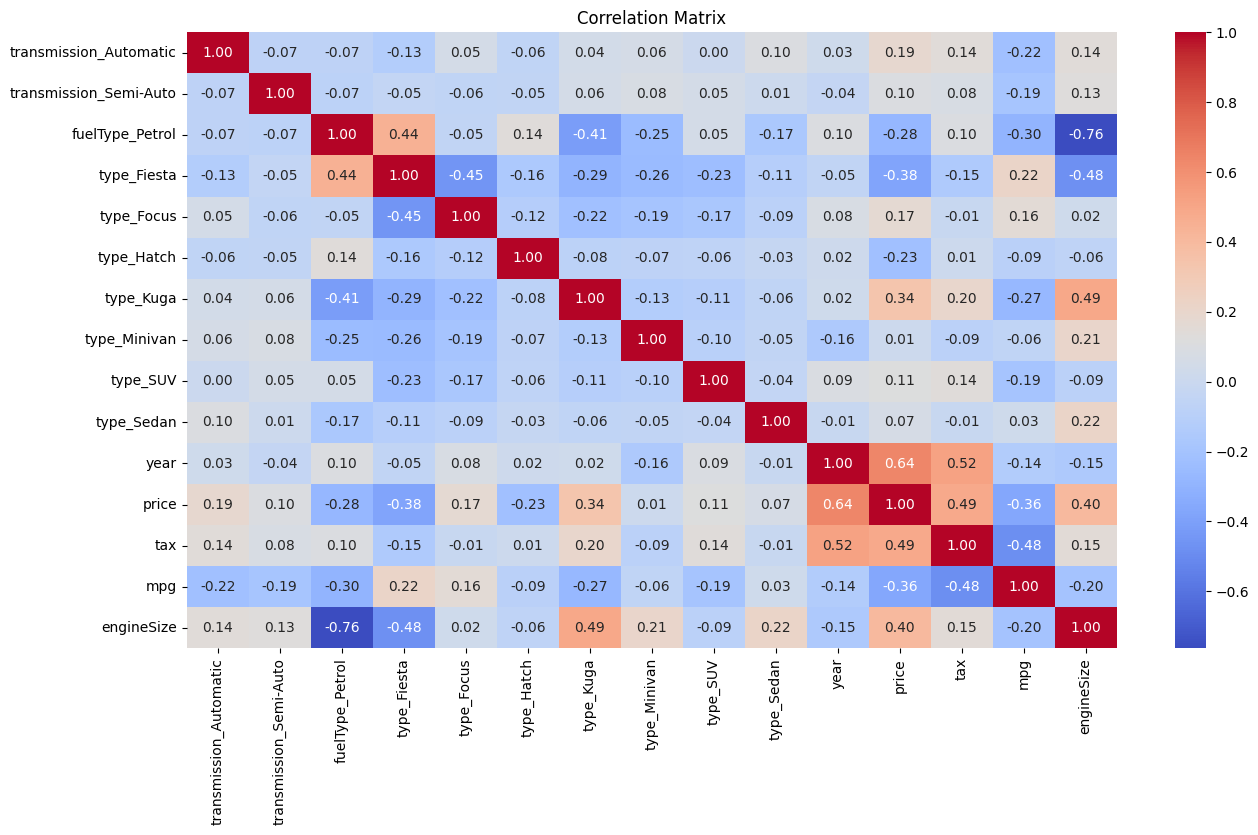

In [2710]:
corr(df)

Same for engineSize

In [2711]:
df.drop(columns =['engineSize'], inplace = True)

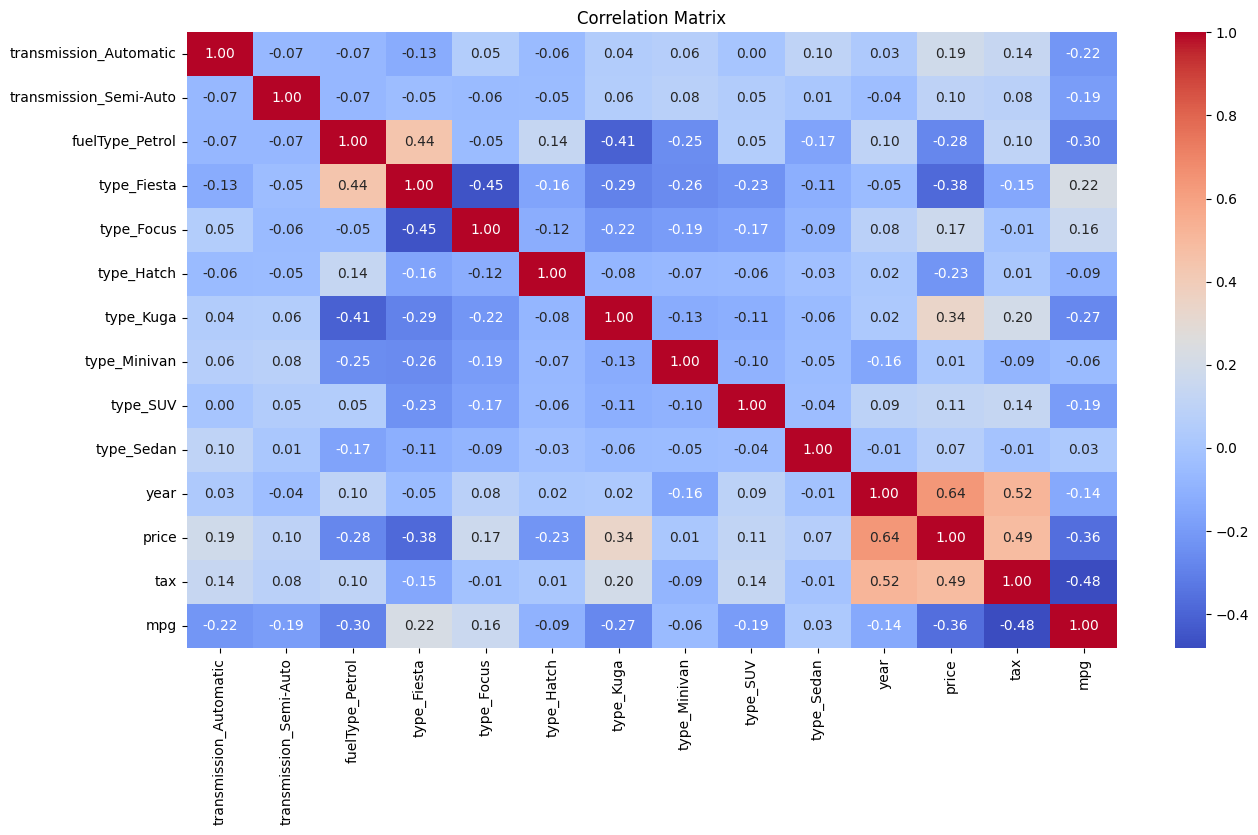

In [2712]:
corr(df)

In [2713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transmission_Automatic  16436 non-null  float64
 1   transmission_Semi-Auto  16436 non-null  float64
 2   fuelType_Petrol         16436 non-null  float64
 3   type_Fiesta             16436 non-null  float64
 4   type_Focus              16436 non-null  float64
 5   type_Hatch              16436 non-null  float64
 6   type_Kuga               16436 non-null  float64
 7   type_Minivan            16436 non-null  float64
 8   type_SUV                16436 non-null  float64
 9   type_Sedan              16436 non-null  float64
 10  year                    16436 non-null  float64
 11  price                   16436 non-null  float64
 12  tax                     16436 non-null  float64
 13  mpg                     16436 non-null  float64
dtypes: float64(14)
memory usage: 1.8 MB


Lucky, we don't have high corrrelation between features.

Train-test

In [2714]:
X = df.drop(columns=['price'])
y = df['price']


In [2715]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2716]:

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


In [2717]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.gaussian_process import GaussianProcessRegressor




modelos_regressao = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('XGBRegressor', XGBRegressor()),
    ('CatBoostRegressor', CatBoostRegressor(verbose=False)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('GaussianProcessRegressor', GaussianProcessRegressor()),
    ('LGBMRegressor', LGBMRegressor()),
]



Prediction test

In [2718]:
from sklearn.metrics import mean_squared_error, r2_score


metricas = pd.DataFrame(columns=['Modelo', 'MSE', 'R²'])

for name, model in modelos_regressao:  
    
    model.fit(X_train, y_train)
    
   
    y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    nova_linha = pd.DataFrame({'Modelo': [name], 'MSE': [mse], 'R²': [r2]})
    metricas = pd.concat([metricas, nova_linha], ignore_index=True)


print(metricas)



    

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 11505, number of used features: 13
[LightGBM] [Info] Start training from score 12355.629465
                      Modelo           MSE        R²
0           LinearRegression  3.879436e+06  0.755092
1                      Ridge  3.879404e+06  0.755094
2                      Lasso  3.879823e+06  0.755067
3      RandomForestRegressor  1.593163e+06  0.899424
4  GradientBoostingRegressor  2.230138e+06  0.859212
5               XGBRegressor  1.543209e+06  0.902577
6          CatBoostRegressor  1.548535e+06  0.902241
7        KNeighborsRegressor  1.954671e+06  0.876602
8   GaussianProcessRegressor  2.435602e+06  0.846241
9              LGBMRegressor  1.618394e+06  0.897831


In [2719]:
metricas.sort_values('R²', ascending= False)

,Modelo,MSE,R²
5,XGBRegressor,1.543209e+06,0.902577
6,CatBoostRegressor,1.548535e+06,0.902241
3,RandomForestRegressor,1.593163e+06,0.899424
9,LGBMRegressor,1.618394e+06,0.897831
7,KNeighborsRegressor,1.954671e+06,0.876602
4,GradientBoostingRegressor,2.230138e+06,0.859212
8,GaussianProcessRegressor,2.435602e+06,0.846241
1,Ridge,3.879404e+06,0.755094
0,LinearRegression,3.879436e+06,0.755092
2,Lasso,3.879823e+06,0.755067


The besy model is XGBRegressor

In [2720]:
model = XGBRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test).round(0)


comparison_df = pd.DataFrame({'Real_Price': y_test, 'Predicted_Price': y_pred})


In [2721]:
comparison_df=comparison_df.sample(25)

In [2722]:
def error(df):
    df['Error_(%)'] = df.apply(lambda row: -(row['Real_Price'] - row['Predicted_Price']) * 100 / row['Real_Price'] if row['Real_Price'] >= row['Predicted_Price'] else (row['Predicted_Price'] - row['Real_Price']) * 100 / row['Predicted_Price'], axis=1).round(1)
    return df.head(25).sort_values(by='Error_(%)',ascending = True)   
    
error(comparison_df)   

,Real_Price,Predicted_Price,Error_(%)
7834,9250.0,7915.0,-14.4
11377,14000.0,12210.0,-12.8
5719,17990.0,15703.0,-12.7
13021,10980.0,9660.0,-12.0
13963,23999.0,21788.0,-9.2
11781,15500.0,14151.0,-8.7
1178,17998.0,16455.0,-8.6
14842,18400.0,16987.0,-7.7
14472,12300.0,11583.0,-5.8
6942,16000.0,15714.0,-1.8
